In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
pd.options.display.max_columns = None

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
#Finding shape of dataset
data.shape

(284807, 31)

In [8]:
print("Number of Rows",data.shape[0])
print("Number of olumns",data.shape[1])

Number of Rows 284807
Number of olumns 31


In [9]:
#info. about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
#chaecking null values in dataset
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data['Amount'] = sc.fit_transform(data['Amount'].values.reshape(-1, 1))

In [12]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [13]:
data = data.drop(['Time'],axis=1)

In [14]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [15]:
#Cleaning duplicate value
data.duplicated().any()

True

In [16]:
data = data.drop_duplicates()

In [17]:
data.shape

(275663, 30)

Class
0    99.828414
1     0.171586
Name: Class, dtype: float64


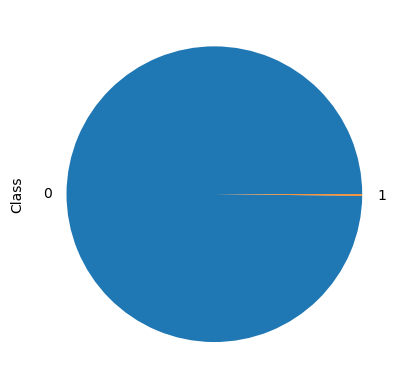

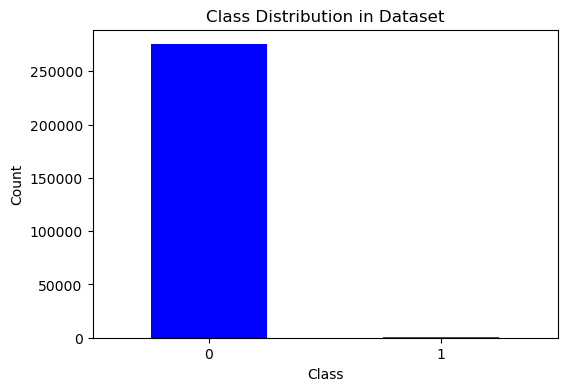

In [18]:
#handling Imbalanced
#checking the class variable in percentage
print((data.groupby ('Class') ['Class'].count()/data['Class'].count()) *100)
((data.groupby('Class') ['Class'].count()/data['Class'].count()) *100).plot.pie()
plt.figure(figsize=(6,4))
data['Class'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in Dataset")
plt.xticks(rotation=0)  
plt.show()


In [19]:
classes=data['Class'].value_counts()
normal_share=classes[0]/data['Class'].count()*100
fraud_share=classes[1]/data['Class'].count()*100

print(normal_share)
print(fraud_share)


99.82841367902112
0.17158632097887638


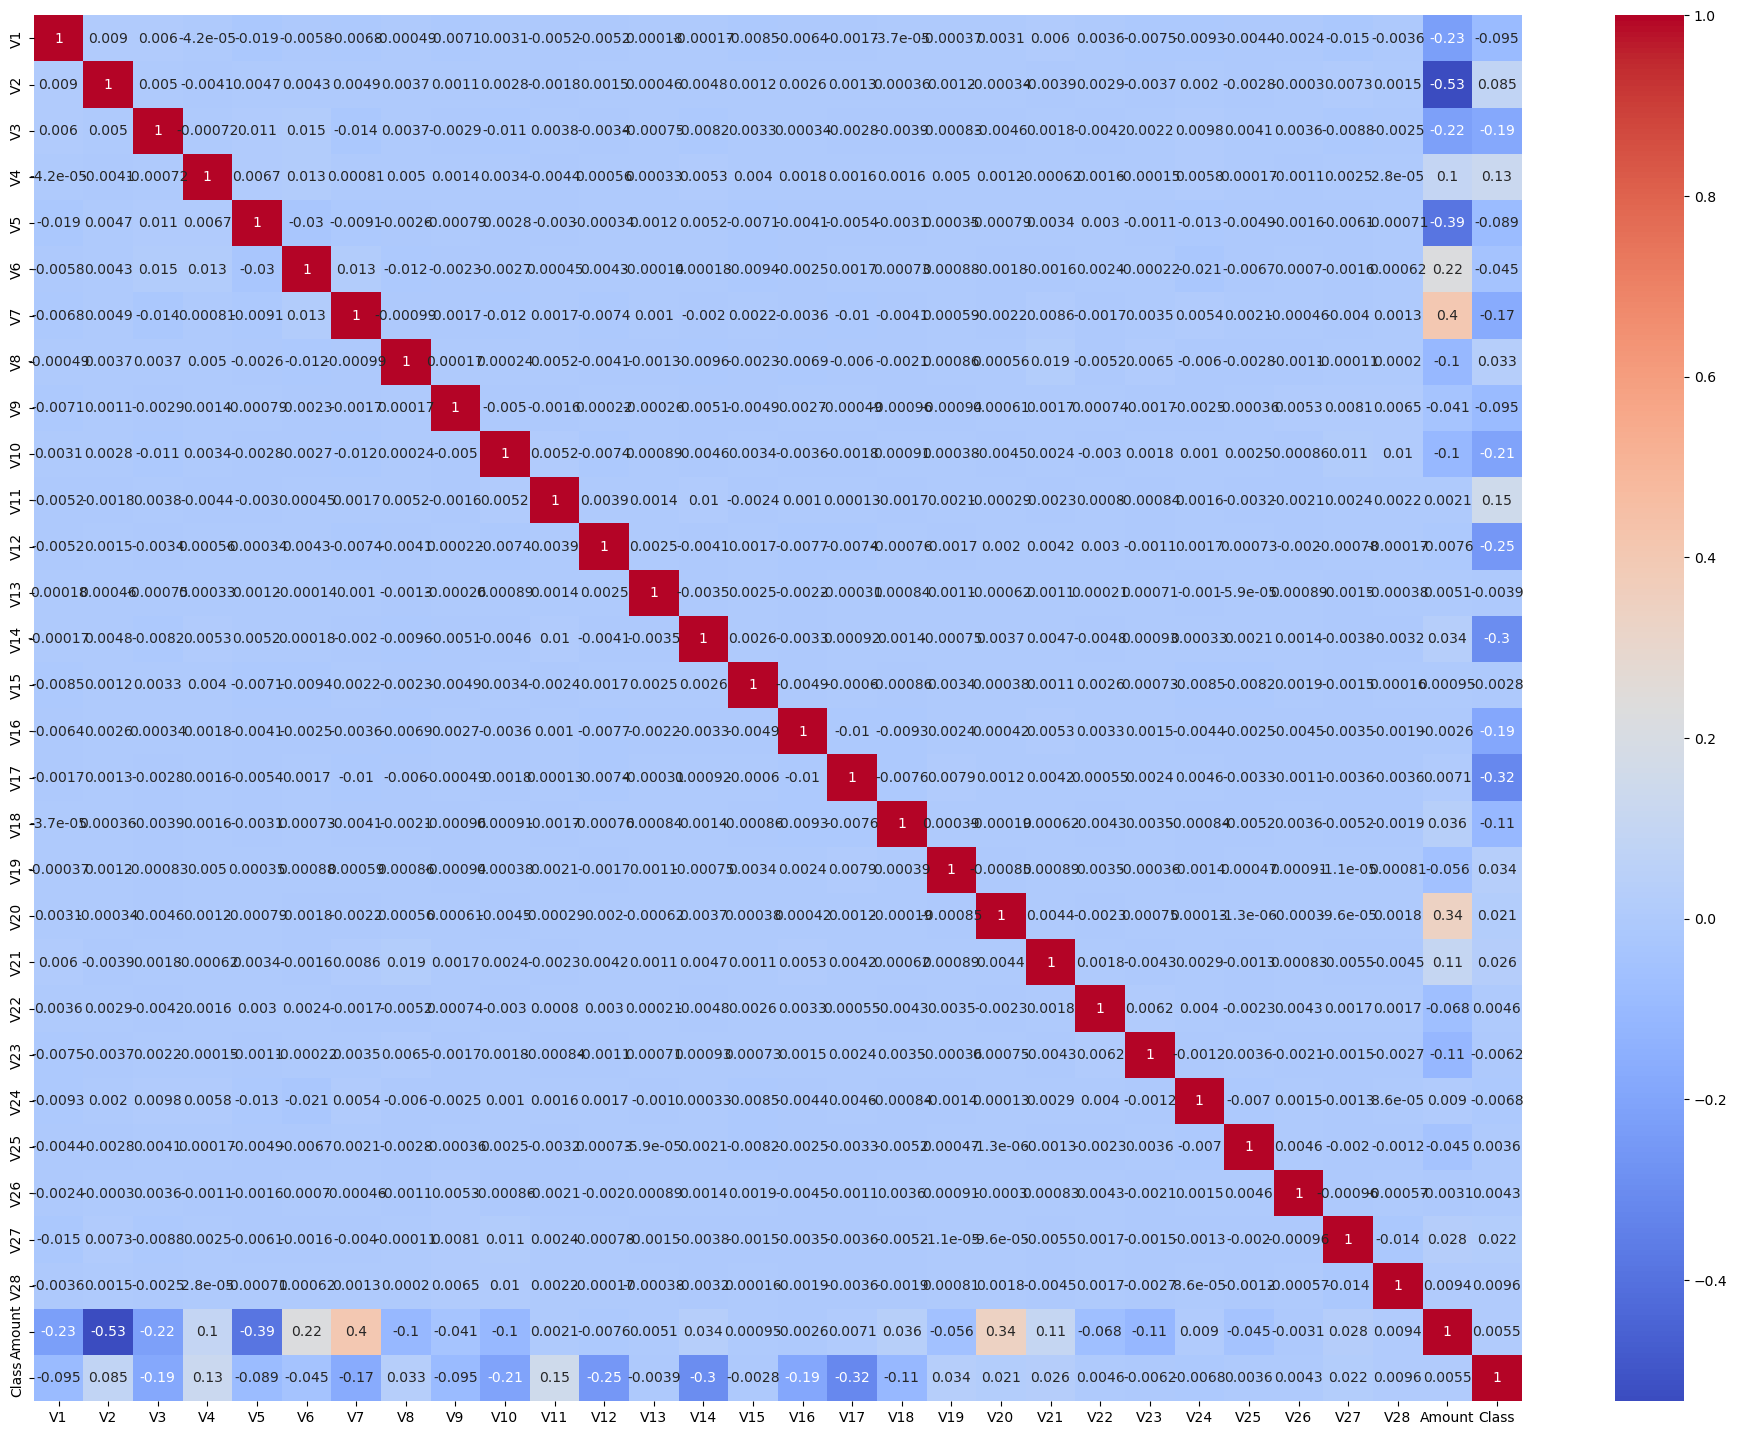

In [20]:
#checking the correlation in the heatmap
corr = data.corr()
corr
plt.figure(figsize=(24,18))

sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.show()
            

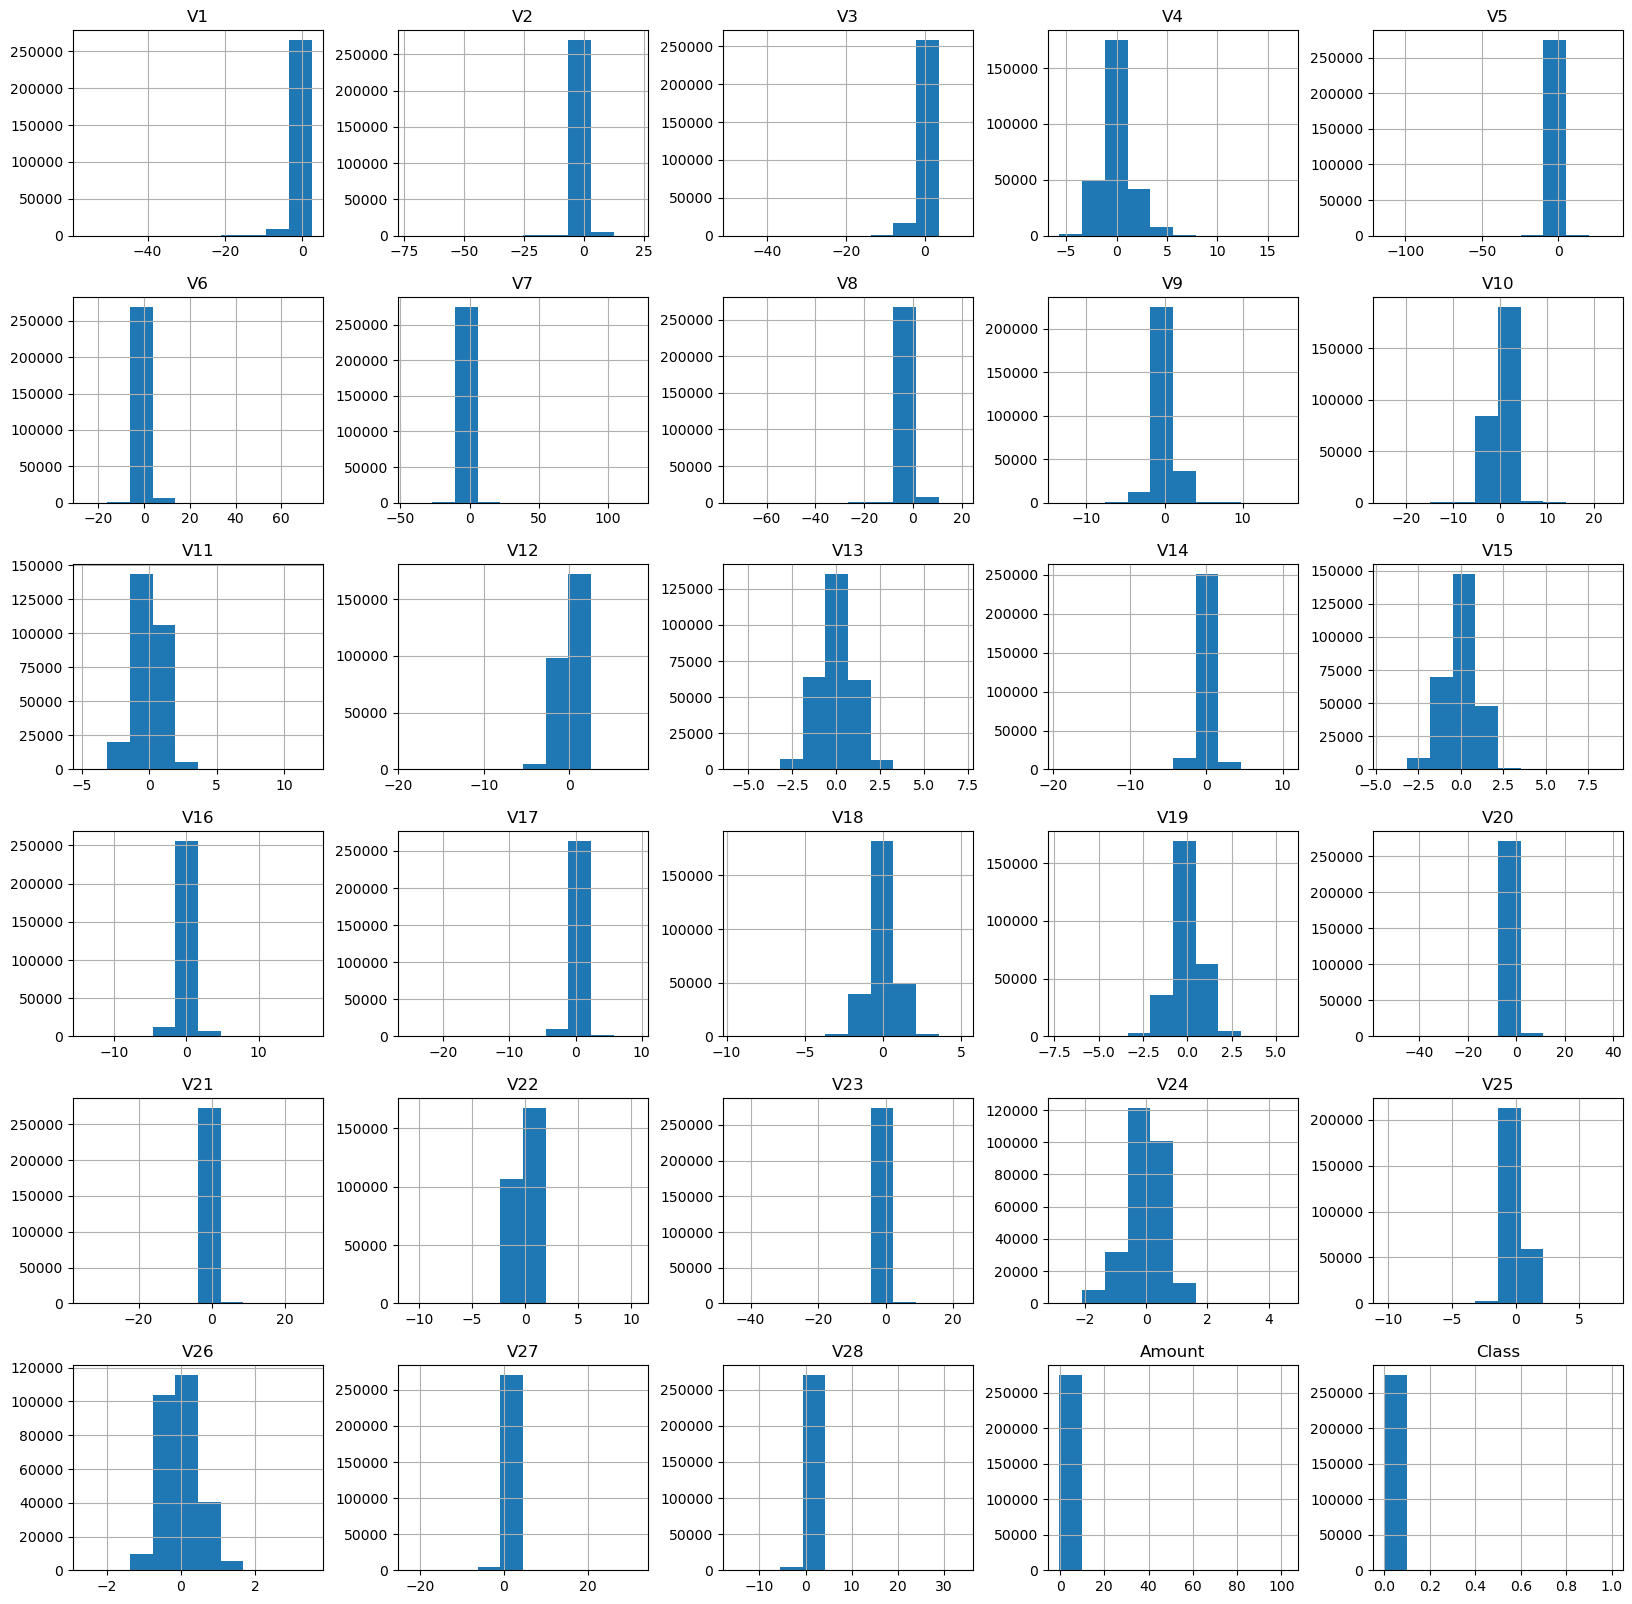

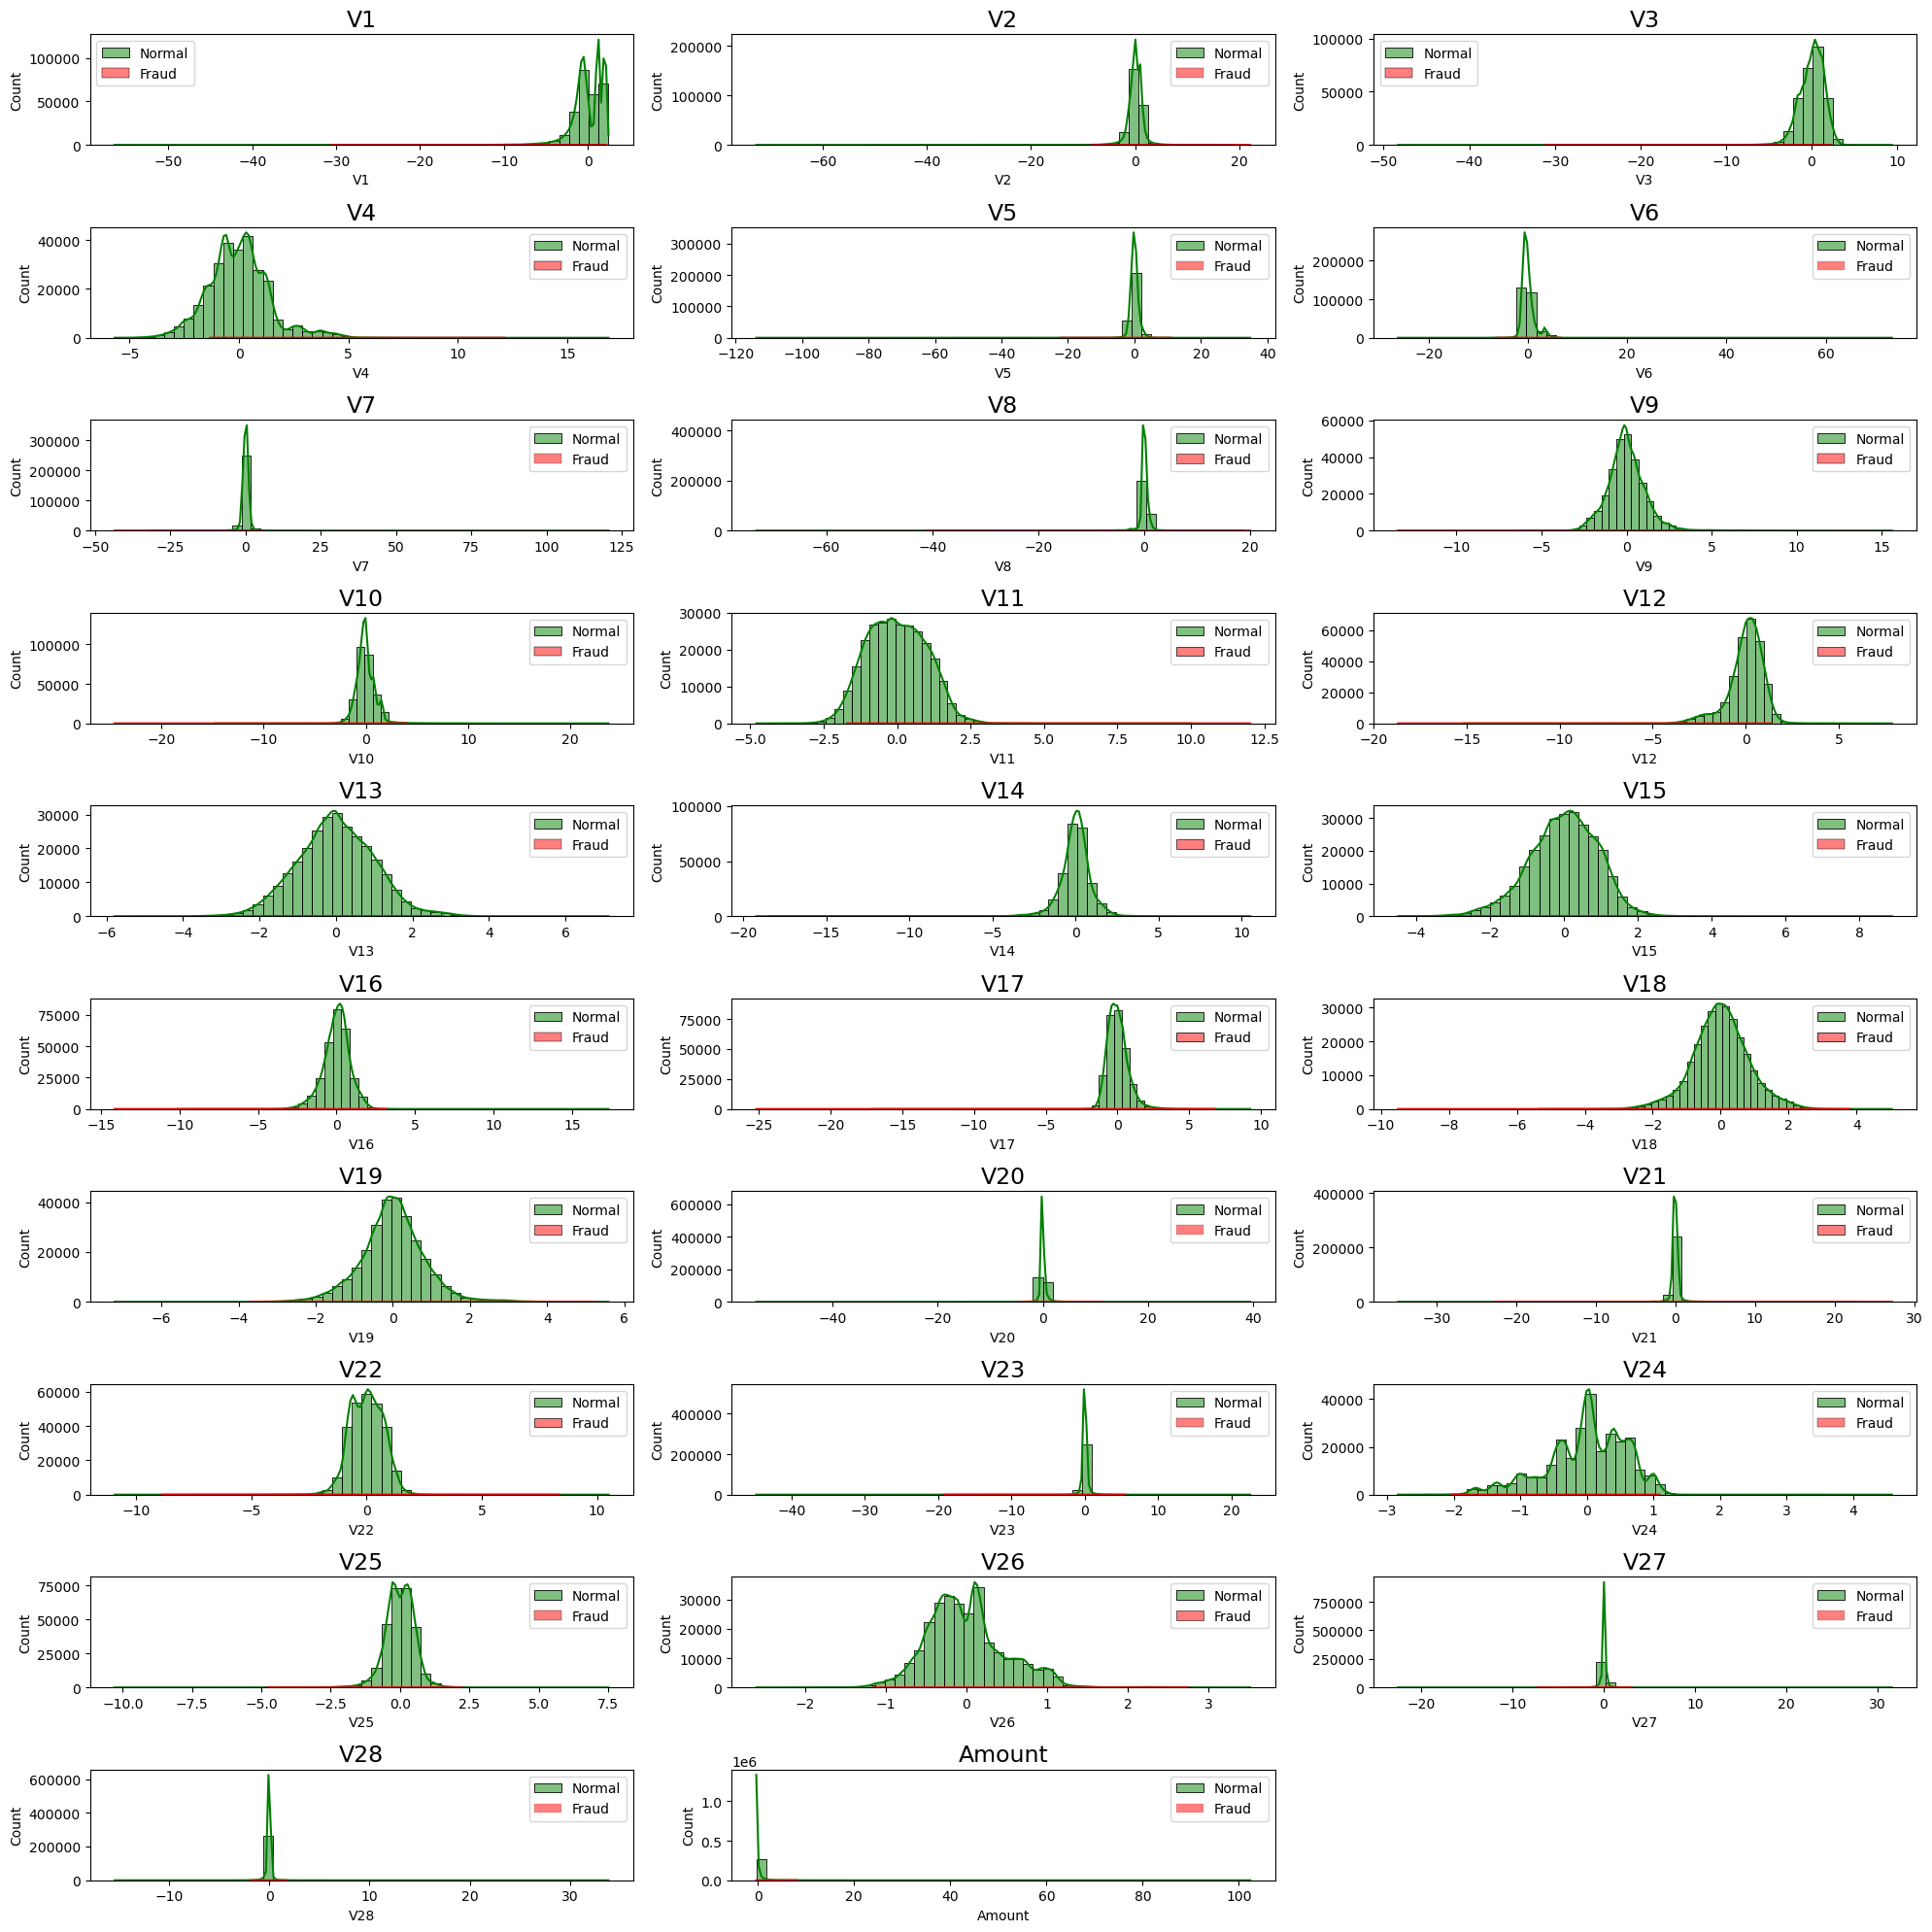

In [174]:
#plotting histogram for each parameter
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to plot
cols = data.columns[:-1]  

# Define fraud and normal transaction masks
normal_records = data[data['Class'] == 0]
fraud_records = data[data['Class'] == 1]

plt.figure(figsize=(20, 20))  

for n, col in enumerate(cols):
    plt.subplot(10, 3, n+1)
    sns.histplot(normal_records[col], color='green', kde=True, label='Normal', bins=50)
    sns.histplot(fraud_records[col], color='red', kde=True, label='Fraud', bins=50)
    plt.title(col, fontsize=17)
    plt.legend()

plt.tight_layout()  
plt.show()

In [21]:
#store feature matrix in x and target in y
x = data.drop('Class',axis=1)
y = data['Class']

In [22]:
# sr=tore feature matrix in x and target in vector y
X = data.drop('Class',axis=1)
y = data['Class']

In [23]:
#splitting dataset into training set and  Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42 )

In [24]:
# Handling Imbalanced Dataset
# Undersampling
# Oversampling

In [25]:
# UNDERSAMPLING
normal = data[data['Class']==0]
fraud = data[data['Class']==1]


In [26]:
fraud.shape

(473, 30)

In [27]:
normal.shape

(275190, 30)

In [28]:
normal_sample = normal.sample(n=473)
normal_sample.shape

(473, 30)

In [29]:
new_data = pd.concat([normal_sample,fraud])

new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [30]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
117346,-0.509225,0.960404,1.662142,0.006561,-0.049313,-0.613933,0.651526,0.049806,-0.424165,-0.362929,0.114610,0.145408,-0.038226,0.190897,1.076912,-0.188096,0.003274,-0.904242,-0.469716,0.080614,-0.171662,-0.421656,0.073532,0.379932,-0.305578,0.080382,0.278285,0.122005,-0.305372,0
32757,0.735905,-0.865480,1.239074,1.649289,-1.233130,0.767035,-0.791463,0.491532,1.155300,-0.123551,0.649233,0.436069,-2.013144,-0.023924,-0.954316,-0.333307,0.238027,0.222385,-0.309417,0.015929,0.273262,0.723978,-0.249738,0.245670,0.439962,-0.125931,0.053184,0.043585,0.296460,0
60448,-1.059387,0.974301,0.939933,-0.037251,0.290567,-0.585923,0.499935,0.461846,-0.915935,-0.710196,0.540369,0.451258,-0.453485,0.836643,-0.401525,0.627267,-0.851901,0.648465,-0.491492,-0.172245,0.226253,0.328308,-0.220446,-0.007172,0.186592,-0.501419,-0.032314,0.012770,-0.253677,0
66996,1.500197,-1.176722,0.467992,-1.627986,-1.371589,0.018870,-1.364456,0.060619,-1.794899,1.593695,0.406773,-0.511811,0.640939,-0.348572,0.205802,0.301069,-0.190860,1.088502,0.171570,-0.263691,-0.060809,0.187886,-0.126933,-0.530508,0.422419,-0.068363,0.045205,0.009866,-0.270069,0
81759,1.133498,-0.056856,0.063069,0.296301,-0.466467,-1.048438,0.217256,-0.159490,-0.163693,0.058508,1.473281,0.549652,-0.868925,0.783101,0.230329,0.154622,-0.370909,0.001046,0.221125,-0.030746,0.022916,-0.099146,-0.077650,0.567647,0.417393,0.567394,-0.088590,0.001781,-0.113544,0


In [31]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42 )

In [33]:

# Logistic regression

from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [34]:
y_pred1 = log.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)


0.9473684210526315

In [36]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [37]:
precision_score(y_test,y_pred1)

0.9791666666666666

In [38]:
recall_score(y_test,y_pred1)

0.9215686274509803

In [39]:
f1_score(y_test,y_pred1)

0.9494949494949495

In [40]:
f1_score(y_test,y_pred1)

0.9494949494949495

In [41]:
#Descision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [42]:
y_pred2 = dt.predict(X_test)

In [43]:
accuracy_score(y_test,y_pred2)

0.9315789473684211

In [44]:
precision_score(y_test,y_pred2)

0.9405940594059405

In [45]:
recall_score(y_test,y_pred2)

0.9313725490196079

In [46]:
f1_score(y_test,y_pred2)

0.9359605911330049

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
y_pred3 = dt.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred3)

0.9315789473684211

In [50]:
precision_score(y_test,y_pred3)

0.9405940594059405

In [51]:
recall_score(y_test,y_pred3)

0.9313725490196079

In [52]:
f1_score(y_test,y_pred3)

0.9359605911330049

In [53]:
import pandas as pd
from sklearn.metrics import accuracy_score

final_data = pd.DataFrame({
    'Models': ['LR', 'DT', 'RF'],
    'ACC': [
        accuracy_score(y_test, y_pred1) * 100,
        accuracy_score(y_test, y_pred2) * 100,
        accuracy_score(y_test, y_pred3) * 100
    ]
})

print (final_data)

  Models        ACC
0     LR  94.736842
1     DT  93.157895
2     RF  93.157895


C:\Users\Omnirio\AppData\Local\Temp\ipykernel_15308\3144491220.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='ACC', data=final_data, palette='viridis')


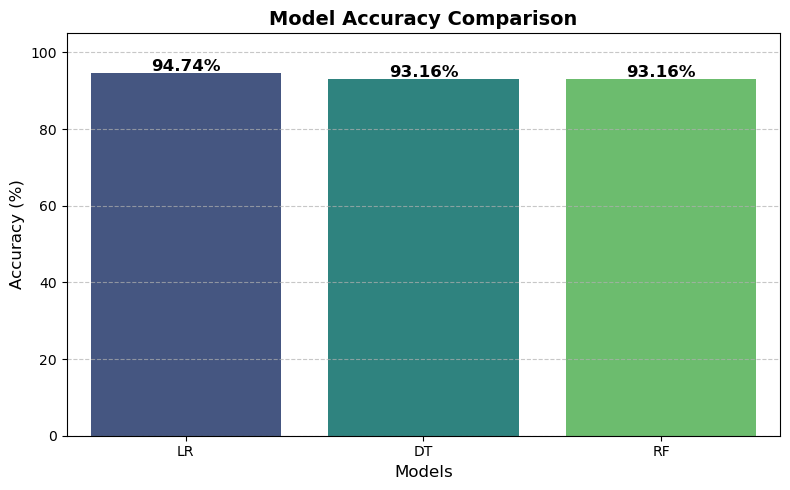

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting model accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x='Models', y='ACC', data=final_data, palette='viridis')

for i, acc in enumerate(final_data['ACC']):
    plt.text(i, acc + 0.5, f"{acc:.2f}%", ha='center', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.ylim(0, 105)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [55]:
# OVERSAMPLING

In [56]:
X = data.drop('Class',axis=1)
y = data['Class']

In [57]:
X.shape

(275663, 29)

In [58]:
y.shape

(275663,)

In [59]:
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(X,y)

In [60]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2 ,random_state=42 )

In [62]:
# Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [64]:
y_pred1 = log.predict(X_test)

In [65]:
accuracy_score(y_test,y_pred1)

0.945773828990879

In [66]:
precision_score(y_test,y_pred1)

0.973081969743748

In [67]:
recall_score(y_test,y_pred1)

0.9168408995872952

In [68]:
f1_score(y_test,y_pred1)

0.944124612691548

In [69]:
#Descision tree classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [71]:
y_pred2 = dt.predict(X_test)

In [72]:
accuracy_score(y_test,y_pred2)

0.998128565718231

In [73]:
precision_score(y_test,y_pred2)

0.9970970843841284

In [74]:
recall_score(y_test,y_pred2)

0.9991636819809828

In [75]:
f1_score(y_test,y_pred2)

0.9981293134762078

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [77]:
y_pred3 = dt.predict(X_test)

In [78]:
accuracy_score(y_test,y_pred3)

0.998128565718231

In [79]:
precision_score(y_test,y_pred3)

0.9970970843841284

In [80]:
recall_score(y_test,y_pred3)

0.9991636819809828

In [81]:
f1_score(y_test,y_pred3)

0.9981293134762078

In [82]:
import pandas as pd
from sklearn.metrics import accuracy_score

final_data = pd.DataFrame({
    'Models': ['LR', 'DT', 'RF'],
    'ACC': [
        accuracy_score(y_test, y_pred1) * 100,
        accuracy_score(y_test, y_pred2) * 100,
        accuracy_score(y_test, y_pred3) * 100
    ]
})

print (final_data)

  Models        ACC
0     LR  94.577383
1     DT  99.812857
2     RF  99.812857


C:\Users\Omnirio\AppData\Local\Temp\ipykernel_15308\3144491220.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='ACC', data=final_data, palette='viridis')


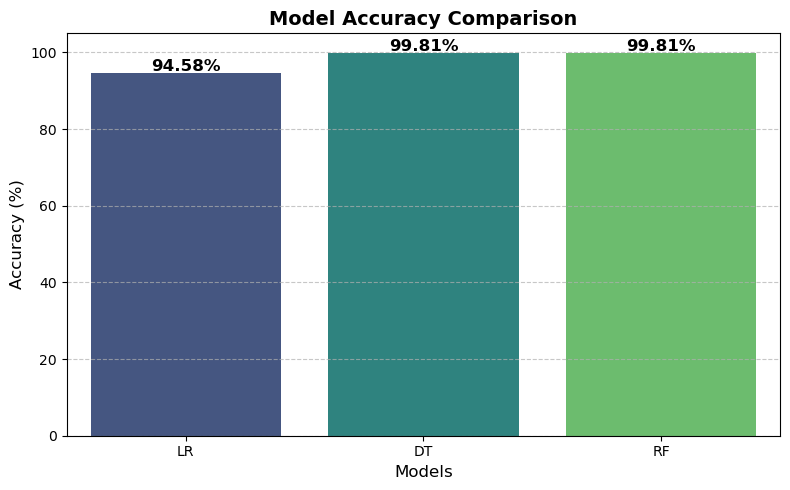

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting model accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x='Models', y='ACC', data=final_data, palette='viridis')

for i, acc in enumerate(final_data['ACC']):
    plt.text(i, acc + 0.5, f"{acc:.2f}%", ha='center', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.ylim(0, 105)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [84]:
#saving the model
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [176]:
import joblib


In [178]:
joblib.dump(rf1,"fraud_model2")

['fraud_model2']

In [180]:
joblib.load("fraud_model2")

RandomForestClassifier()